In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [8]:
#Importing the test Dataset
dataset_full_test = pd.read_csv('azure_wq_test_entire_dataset_woDT.csv')
dataset_full_test = dataset_full_test[['temp', 'cond', 'do', 'turb', 'chl-a']] #'datetime',
dataset_full_test.sort_index()
print(dataset_full_test.shape)
dataset_full_test.tail()

(1703, 5)


,temp,cond,do,turb,chl-a
1698,28.85,114.82,4.18,233.61,756.15
1699,28.86,114.97,4.15,162.08,700.53
1700,28.92,114.65,4.95,198.85,705.66
1701,28.96,115.16,5.22,205.18,707.68
1702,28.90,115.31,6.73,239.66,1059.84


In [3]:
#TEST FOR JSON #FOR AWS IOT CORE
import json

for index, row in dataset_full_test.iterrows():
    a = { "datetime" : row['datetime'],
         "temp" : row['temp'],
         "cond" : row['cond'],
         "do":  row['do'],
         "turb": row['turb']

    }

    # conversion to JSON done by dumps() function
    b = json.dumps(a)
    print(b)

{"datetime": "2019-02-20 12:00:00", "temp": 29.55674, "cond": 92.12651, "do": 6.491213, "turb": 32.86783}
{"datetime": "2019-02-20 12:10:00", "temp": 29.59175, "cond": 92.22813, "do": 6.724226, "turb": 24.304920000000006}
{"datetime": "2019-02-20 12:20:00", "temp": 29.57693, "cond": 91.93182, "do": 6.6773570000000015, "turb": 47.46174}
{"datetime": "2019-02-20 12:40:00", "temp": 29.64378, "cond": 92.78736, "do": 7.6294309999999985, "turb": 26.5817}
{"datetime": "2019-02-20 14:40:00", "temp": 29.67038, "cond": 91.74003, "do": 8.935707, "turb": 40.49232}
{"datetime": "2019-02-20 16:10:00", "temp": 29.77673, "cond": 93.55465, "do": 10.54057, "turb": 38.54684}
{"datetime": "2019-02-20 18:30:00", "temp": 29.75532, "cond": 92.54897, "do": 9.730732, "turb": 72.77338}
{"datetime": "2019-02-20 18:50:00", "temp": 29.67714, "cond": 92.23919, "do": 8.159566, "turb": 40.00311}
{"datetime": "2019-02-20 19:50:00", "temp": 29.80825, "cond": 93.56911, "do": 9.01524, "turb": 58.92992}
{"datetime": "2019

{"datetime": "2019-03-21 08:14:44", "temp": 30.95662, "cond": 97.87739, "do": 5.567847, "turb": 97.41467}
{"datetime": "2019-03-21 08:24:44", "temp": 30.94625, "cond": 97.49836, "do": 6.39811, "turb": 98.18585}
{"datetime": "2019-03-21 08:54:44", "temp": 30.92566, "cond": 97.93584, "do": 5.4892629999999984, "turb": 94.70592}
{"datetime": "2019-03-21 09:44:44", "temp": 30.91855, "cond": 97.42774, "do": 6.153256, "turb": 90.22567}
{"datetime": "2019-03-21 10:24:44", "temp": 30.96655, "cond": 97.03033, "do": 7.619564, "turb": 63.5016}
{"datetime": "2019-03-21 10:34:44", "temp": 30.95703, "cond": 97.28783, "do": 7.318791, "turb": 79.22825}
{"datetime": "2019-03-21 10:44:44", "temp": 30.93592, "cond": 97.62417, "do": 6.125038, "turb": 83.96728}
{"datetime": "2019-03-21 11:34:44", "temp": 30.924740000000003, "cond": 97.38568, "do": 6.935914, "turb": 86.81205}
{"datetime": "2019-03-21 12:14:44", "temp": 30.927640000000004, "cond": 97.9076, "do": 5.84551, "turb": 84.67511999999998}
{"datetime"

{"datetime": "2019-09-29 20:32:00", "temp": 29.61755, "cond": 112.114, "do": 7.484017999999999, "turb": 144.5353}
{"datetime": "2019-09-29 21:02:00", "temp": 29.619740000000004, "cond": 111.91, "do": 5.289295, "turb": 173.1263}
{"datetime": "2019-09-29 23:47:00", "temp": 29.5959, "cond": 111.7487, "do": 8.570214, "turb": 206.5399}
{"datetime": "2019-09-30 01:32:00", "temp": 29.48847, "cond": 111.2218, "do": 8.31789, "turb": 242.4389}
{"datetime": "2019-09-30 03:47:00", "temp": 29.29696, "cond": 111.6869, "do": 5.089345, "turb": 177.0154}
{"datetime": "2019-09-30 08:02:00", "temp": 29.10893, "cond": 111.5301, "do": 4.167886, "turb": 153.2499}
{"datetime": "2019-09-30 09:02:00", "temp": 29.07504, "cond": 111.5825, "do": 4.128924, "turb": 147.7991}
{"datetime": "2019-09-30 09:32:00", "temp": 29.10196, "cond": 111.7959, "do": 3.821964, "turb": 160.0141}
{"datetime": "2019-09-30 09:47:00", "temp": 29.08844, "cond": 111.6853, "do": 4.281829, "turb": 159.0964}
{"datetime": "2019-09-30 10:02:0

In [12]:
len(dataset_full_test)

AttributeError: 'int' object has no attribute 'type'

In [9]:
#Preparing Input & Output Features
X = dataset_full_test[:]
Y = X.pop('chl-a')
print(X.shape)
print(Y.shape)
Y.head()

(1703, 4)
(1703,)


0   39.65
1   40.57
2   40.88
3   47.05
4   59.40
Name: chl-a, dtype: float64

# LightGBM

In [10]:
#if fails, use the yml file to update the environment using  'conda env update --file local.yml --prune'
# then install cloudpickle using 'conda install -c conda-forge/label/cf202003 cloudpickle'
#Loading the model
filename = 'lgbm_woDT.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [11]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9515081227882481
R2: 0.951508
MAE: 33.459084
MAE: 56.129588


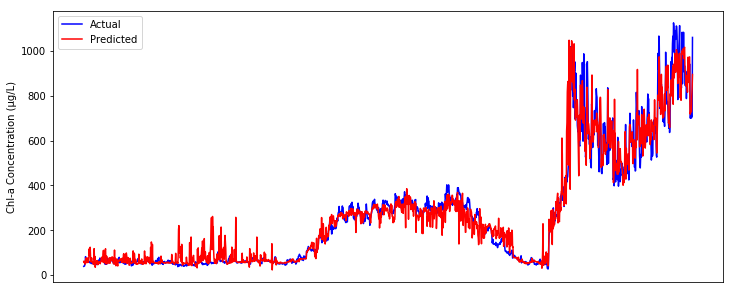

In [12]:
plt.figure(figsize=(12,5))
plt.ylabel('Chl-a Concentration (µg/L)')
plt.plot(Y, color='blue', label = 'Actual')
plt.plot(predicted_Y, color='red', label = 'Predicted')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# RF

In [14]:
#Loading the model
filename = 'rf_woDT.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [15]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9365545171083787
R2: 0.936555
MAE: 40.309815
MAE: 64.203352


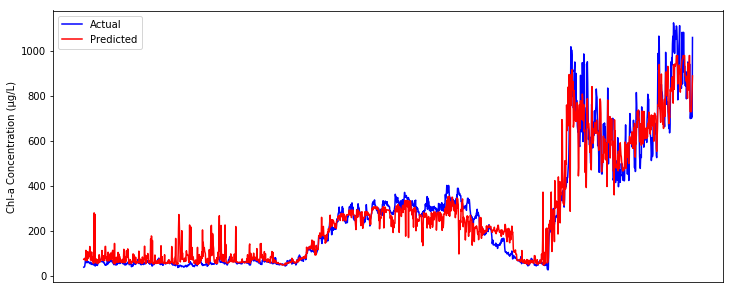

In [16]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()

# XGBoost

In [17]:
#Loading the model
filename = 'xgboost_woDT.pkl'
entire_ds_model = pickle.load(open(filename, 'rb'))

In [18]:
#Testing the model on test dataset
result = entire_ds_model.score(X,Y)
predicted_Y = pd.DataFrame(entire_ds_model.predict(X))
print(result)
print('R2: %f' % (r2_score(Y, predicted_Y)))
print('MAE: %f' % (mean_absolute_error(Y, predicted_Y)))
print('MAE: %f' % (mean_squared_error(Y, predicted_Y, squared=False))) 



0.9227322902164431
R2: 0.922732
MAE: 50.132286
MAE: 70.852695


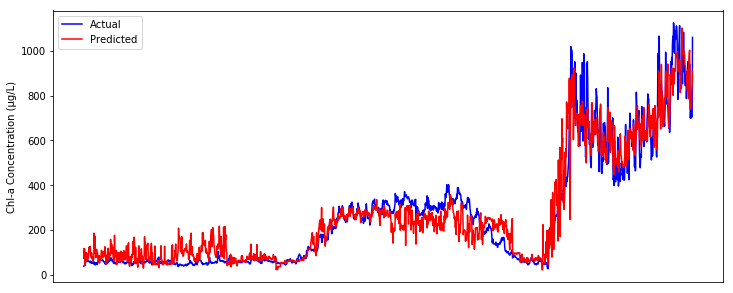

In [19]:
plt.figure(figsize=(12,5))

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(Y, color='blue', label = 'Actual')

plt.plot(predicted_Y, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()